In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'retina'

import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
pd.read_csv?

In [4]:
matches = pd.read_csv('./src/matches.csv')
matches_with_draws = pd.read_csv('./src/matches.wd.csv')

In [5]:
matches = matches.drop('Unnamed: 0', axis=1)
matches.head()

,id,score1,score2,team1,team2,year,score_diff,winner,matches_played,matches_won,...,podium_score_yearly,cups_won_yearly,matches_played_2,matches_won_2,years_played_2,podium_score_2,cups_won_2,matches_won_percent_2,podium_score_yearly_2,cups_won_yearly_2
0,0,4,0,Brazil,Mexico,1950,4,1,92.0,65.0,...,6.00,0.294118,49.0,14.0,14.0,False,0.0,28.571429,0.00,0.0
1,1,3,0,Yugoslavia,Switzerland,1950,3,1,34.0,14.0,...,0.25,0.000000,27.0,9.0,8.0,False,0.0,33.333333,0.00,0.0
2,3,4,1,Yugoslavia,Mexico,1950,3,1,34.0,14.0,...,0.25,0.000000,49.0,14.0,14.0,False,0.0,28.571429,0.00,0.0
3,4,2,0,Brazil,Yugoslavia,1950,2,1,92.0,65.0,...,6.00,0.294118,34.0,14.0,8.0,2,0.0,41.176471,0.25,0.0
4,5,2,1,Switzerland,Mexico,1950,1,1,27.0,9.0,...,0.00,0.000000,49.0,14.0,14.0,False,0.0,28.571429,0.00,0.0


In [6]:
matches_with_draws = matches_with_draws.drop('Unnamed: 0', axis=1)
matches_with_draws.head()

,id,score1,score2,team1,team2,year,score_diff,winner,matches_played,matches_won,...,podium_score_yearly,cups_won_yearly,matches_played_2,matches_won_2,years_played_2,podium_score_2,cups_won_2,matches_won_percent_2,podium_score_yearly_2,cups_won_yearly_2
0,0,4,0,Brazil,Mexico,1950,4,1,92.0,65.0,...,6.00,0.294118,49.0,14.0,14.0,False,0.0,28.571429,0.00,0.0
1,1,3,0,Yugoslavia,Switzerland,1950,3,1,34.0,14.0,...,0.25,0.000000,27.0,9.0,8.0,False,0.0,33.333333,0.00,0.0
2,2,2,2,Brazil,Switzerland,1950,0,0,92.0,65.0,...,6.00,0.294118,27.0,9.0,8.0,False,0.0,33.333333,0.00,0.0
3,3,4,1,Yugoslavia,Mexico,1950,3,1,34.0,14.0,...,0.25,0.000000,49.0,14.0,14.0,False,0.0,28.571429,0.00,0.0
4,4,2,0,Brazil,Yugoslavia,1950,2,1,92.0,65.0,...,6.00,0.294118,34.0,14.0,8.0,2,0.0,41.176471,0.25,0.0


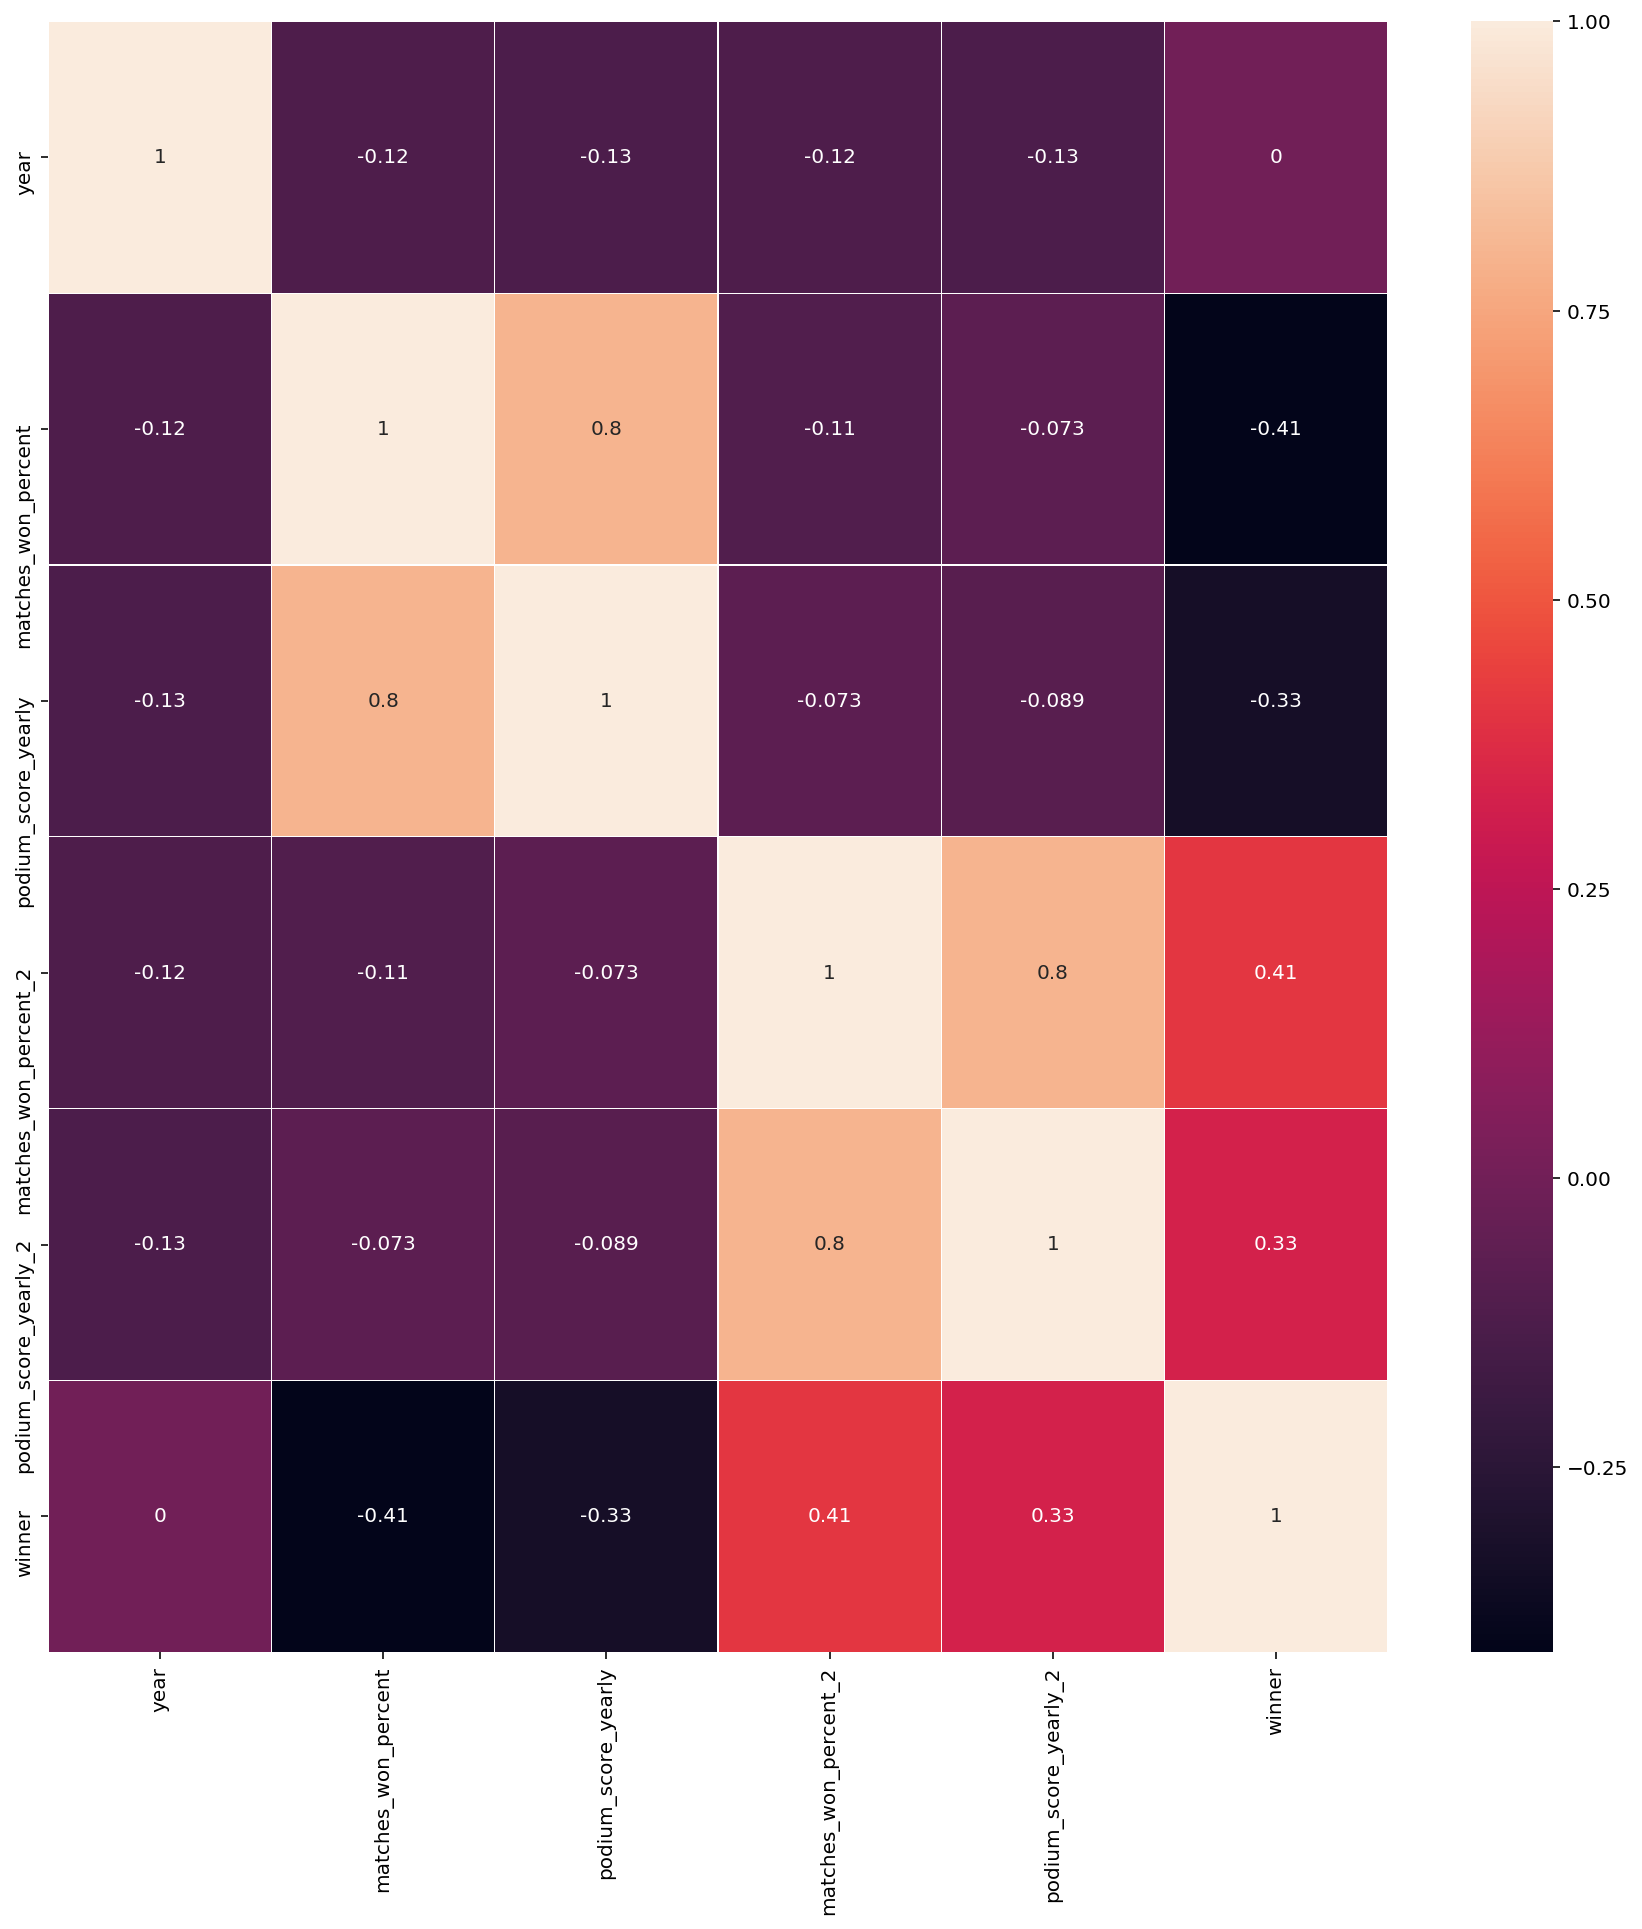

In [38]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(C.corr(), annot=True, linewidths=0.1, linecolor='white', cbar=True)

In [10]:
def normalize(array):
    scaler = StandardScaler()
    array = scaler.fit_transform(array)

    return scaler, array

In [7]:
feature_columns = ['year','matches_won_percent', 'podium_score_yearly', 'matches_won_percent_2', 'podium_score_yearly_2']
C = matches[['year','matches_won_percent', 'podium_score_yearly', 'matches_won_percent_2', 'podium_score_yearly_2', 'winner']]
X = matches[feature_columns]
Y = matches['winner']
W = matches_with_draws[feature_columns]
Z = matches_with_draws['winner']

In [22]:
print('m', X.shape, Y.shape, 'w', W.shape, Z.shape)

m (1178, 5) (1178,) w (1534, 5) (1534,)


In [23]:
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'retina'

import seaborn as sns

from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
W_train, W_test, Z_train, Z_test = train_test_split(W, Z, test_size=0.3)

In [25]:
nss, X_train_norm = normalize(X_train)
wss, W_train_norm = normalize(W_train)

## Cross Validation

In [17]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [55]:
models = []
seed = 8
scoring = 'accuracy'
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.736629 (0.038844)
LDA: 0.737805 (0.040295)
KNN: 0.646665 (0.056055)
CART: 0.639480 (0.076467)
NB: 0.732956 (0.039130)
SVM: 0.544872 (0.055369)


# Narrow win for LDA

### LR: 0.736629 (0.038844) 
### LDA: 0.737805 (0.040295)
### KNN: 0.646665 (0.056055)
### CART: 0.639480 (0.076467)
### NB: 0.732956 (0.039130)
### SVM: 0.544872 (0.055369)

## KNN

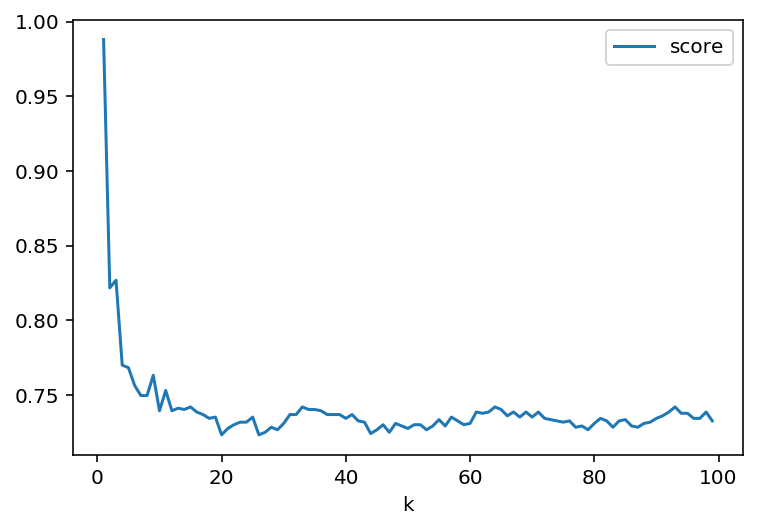

In [26]:
scores = []
for k in range(1,100):
    kna = KNeighborsClassifier(n_neighbors=k)
    kna.fit(X,Y)
    pred = kna.predict(X)
    score = float(sum(pred == Y)) / len(Y)
    scores.append([k, score])
knn_predict = pd.DataFrame(scores,columns=['k','score'])
knn_predict.plot.line(x='k',y='score')

In [27]:
knn_predict.sort_values('score', ascending=True).head()

,k,score
25,26,0.723260
19,20,0.723260
43,44,0.724109
46,47,0.724958
26,27,0.724958


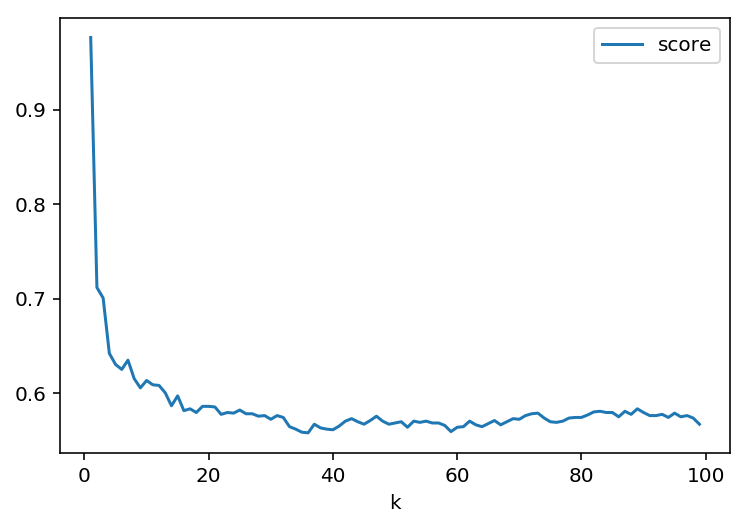

In [29]:
scores = []
for k in range(1,100):
    kna = KNeighborsClassifier(n_neighbors=k)
    kna.fit(W,Z)
    pred = kna.predict(W)
    score = float(sum(pred == Z)) / len(Z)
    scores.append([k, score])
knn_predict = pd.DataFrame(scores,columns=['k','score'])
knn_predict.plot.line(x='k',y='score')

In [30]:
knn_predict.sort_values('score', ascending=True).head()

,k,score
35,36,0.558018
34,35,0.558670
58,59,0.559322
39,40,0.561278
38,39,0.561930


## 72.3% accurate if draws are removed, 55.8% otherwise

### SVM

In [47]:
from sklearn import svm
from sklearn import grid_search

/Users/William/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/William/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [48]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_searcha = grid_search.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_searcha.fit(X, y)
    return grid_searcha.best_params_
svc_param_selection(X,Y,10)

{'C': 0.001, 'gamma': 0.001}

In [49]:
clf = svm.SVC(kernel='rbf', C=0.001, gamma=0.001)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print((accuracy_score(Y_test, y_pred)))

0.4717514124293785


In [50]:
clf = svm.SVC()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print((accuracy_score(Y_test, y_pred)))

0.556497175141243


# SVM only produces 55.6%, which means I need to tune the parameters further

---

# Multi-Layer Perceptron Neural Network

In [8]:
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

from keras import callbacks

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [40]:
def model():
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [41]:
pipe = Pipeline([
    ('rescale', StandardScaler()),
    ('nn', KerasClassifier(build_fn=model, nb_epoch=200, batch_size=128,
                           validation_split=0.2))
])

pipe.fit(X_train.values, Y_train.values)
Y_pred = pipe.predict(X_test.values)
print((accuracy_score(Y_test, Y_pred)))

Train on 659 samples, validate on 165 samples
Epoch 1/1
659/659 [==============================] - 1s 1ms/step - loss: 0.6801 - acc: 0.5630 - val_loss: 0.6121 - val_acc: 0.7091
0.725988700565


# MLP creates 72.5% accuracy